In [1]:
from sklearn import datasets
boston = datasets.load_boston()

In [2]:
X = boston.data
y = boston.target

# kfold cross validation

In [3]:
X = boston.data
y = boston.target
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)

for train_index, test_index in kf.split(X):
    print("TRAIN - ", len(train_index))
    print("TEST - ",  len(test_index))    

TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50


In [4]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=10)
lasso_regressor = Lasso()
ridge_regressor = Ridge()

lasso_mse = []
ridge_mse = []

for train_index, test_index in kf.split(X):
    lasso_regressor.fit(X[train_index], y[train_index])
    ridge_regressor.fit(X[train_index], y[train_index])
    
    lasso_mse.append(mean_squared_error(y[test_index], lasso_regressor.predict(X[test_index])))
    ridge_mse.append(mean_squared_error(y[test_index], ridge_regressor.predict(X[test_index])))
    
sum(lasso_mse) / 10, sum(ridge_mse) / 10

(34.46408458830232, 34.07824620925939)

In [6]:
from sklearn.model_selection import cross_val_score
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
ridge_scores = cross_val_score(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-34.46408458830232, -34.0782462092594)

In [7]:
from sklearn.model_selection import cross_validate
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

scoring = ['neg_mean_squared_error', 'r2']

lasso_scores = cross_validate(lasso_regressor, X, y, cv=10, scoring=scoring)
ridge_scores = cross_validate(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
lasso_scores

{'fit_time': array([0.00097823, 0.0009706 , 0.00097752, 0.00097799, 0.00097656,
        0.        , 0.        , 0.        , 0.        , 0.00097847]),
 'score_time': array([0.00098205, 0.00097775, 0.        , 0.        , 0.        ,
        0.00097656, 0.00097728, 0.00097704, 0.00097728, 0.        ]),
 'test_neg_mean_squared_error': array([ -11.75904887,  -17.87218543,  -10.52504673,  -60.79224355,
         -46.77806854,  -40.75196077,  -17.30562005, -102.67754279,
         -22.8731834 ,  -13.30594575]),
 'test_r2': array([ 0.66289033,  0.33452353, -0.50043664,  0.38035161,  0.33638098,
         0.4584511 , -0.0816218 ,  0.31138236, -0.21362102,  0.29459703])}

In [8]:
from sklearn.model_selection import cross_val_score
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

kf = KFold(n_splits=10, shuffle=True)

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_scores = cross_val_score(ridge_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.953605461769786, -23.510589773526746)

# LOOCV

In [9]:
from sklearn.model_selection import LeaveOneOut

test = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(test):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [10]:
loo = LeaveOneOut()
    
lasso_scores = cross_val_score(lasso_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.409266762049334, -23.862836317209958)

In [11]:
lasso_scores = cross_val_score(
    lasso_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(
    ridge_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

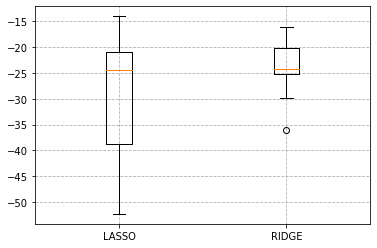

In [12]:
import matplotlib.pyplot as plt
labels=["LASSO", "RIDGE"]
plt.boxplot((lasso_scores, ridge_scores), labels=labels)
plt.grid(linestyle="--")
plt.show()

In [13]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [28]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X)
X_scaled = std.transform(X)

eta0 = 0.0001 
max_iter = 100

In [29]:
from sklearn.model_selection import train_test_split


X_train_dataset, X_test, y_train_dataset, y_test = train_test_split(
            X_scaled,y, test_size=0.2, random_state=42)

sgd_regressor = SGDRegressor(
    eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")
# warm_start - 초기값이 주어지는 것

rmse_val_score = []
rmse_train_score = []
model_list = []

X_train, X_val, y_train, y_val = train_test_split(
    X_train_dataset,y_train_dataset, test_size=0.2, random_state=42)
sgd_regressor.fit(X_train,y_train)

# kf = KFold(n_splits=100, shuffle=True)
# for train_index, test_index in kf.split(X_train_dataset):

for i in range(300):

    y_pred = sgd_regressor.predict(X_train)
    y_true = y_train
    rmse_train_score.append(rmse(y_pred, y_true))

    y_pred = sgd_regressor.predict(X_val)
    y_true = y_val
    rmse_val_score.append(rmse(y_pred, y_true))
    model_list.append(sgd_regressor)

    coef = sgd_regressor.coef_.copy()
    intercept = sgd_regressor.intercept_.copy()

    sgd_regressor = SGDRegressor(
        eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")
    
    sgd_regressor.fit(X_train,y_train, coef_init=coef, intercept_init=intercept)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


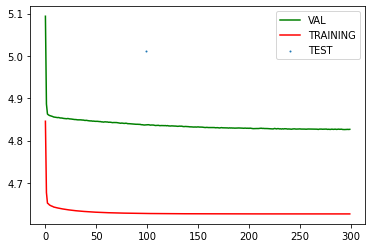

In [30]:
plt.plot(range(len(rmse_val_score)), rmse_val_score,  c="g", label="VAL")
plt.plot(range(len(rmse_train_score)), rmse_train_score,  c="r", label="TRAINING")
plt.scatter(99, rmse(y_test,sgd_regressor.predict(X_test)), s=1, label="TEST")
plt.legend()
plt.show()

In [31]:
np.argsort(rmse_val_score)

array([293, 294, 292, 298, 295, 268, 280, 286, 283, 297, 277, 296, 279,
       299, 289, 278, 256, 272, 282, 284, 290, 287, 242, 273, 266, 285,
       274, 291, 267, 281, 265, 275, 248, 288, 269, 262, 257, 255, 264,
       246, 247, 260, 238, 271, 276, 251, 261, 252, 254, 270, 232, 259,
       240, 241, 263, 258, 253, 234, 249, 239, 243, 223, 230, 227, 250,
       244, 224, 245, 237, 231, 222, 233, 236, 221, 235, 220, 229, 219,
       204, 226, 228, 205, 207, 218, 209, 217, 206, 215, 208, 216, 203,
       225, 210, 213, 214, 200, 211, 202, 198, 195, 197, 212, 194, 199,
       193, 186, 201, 188, 196, 187, 180, 184, 189, 192, 185, 182, 191,
       178, 190, 171, 183, 179, 177, 181, 170, 172, 175, 174, 176, 167,
       168, 169, 162, 163, 173, 166, 161, 157, 160, 165, 164, 159, 158,
       156, 155, 154, 148, 146, 152, 151, 153, 149, 144, 145, 147, 150,
       142, 143, 141, 139, 140, 136, 137, 135, 138, 130, 133, 131, 129,
       134, 132, 126, 128, 127, 123, 122, 125, 121, 124, 119, 11

In [38]:
rmse(y_test,sgd_regressor.predict(X_test))

5.01138437894543

In [33]:
rmse(y_test,model_list[0].predict(X_test))

5.407864024201159

In [36]:
rmse(y_test,model_list[293].predict(X_test))

5.012518923074201

In [37]:
model_list[0].coef_

array([-0.48459133,  0.24731717, -0.22158842,  0.88123055, -0.70049903,
        3.88704131, -0.02395742, -1.77983297,  0.1216014 , -0.49115258,
       -1.78987263,  0.95672295, -3.06346755])